In [2]:
from aerosandbox.atmosphere import Atmosphere
from aerosandbox.modeling import FittedModel
import aerosandbox.numpy as np
altitude = np.linspace(-50e3, 150e3, 1000)
atmo_isa = Atmosphere(altitude=altitude, type="isa")
### Fit the temperature
temperature_isa = atmo_isa.temperature()
pressure_isa=atmo_isa.pressure()
def model(x, p):
    return p["m"] * x + p["b"]
fitted_model = FittedModel(
    model=model,
    x_data=altitude,
    y_data=temperature_isa,
    parameter_guesses={
        "m": 0,
        "b": 0
    }
)
fitted_model.plot()

/Users/Sylvershadowz/Desktop/AeroSandbox/aerosandbox/atmosphere/atmosphere.py:44: RuntimeWarning:

divide by zero encountered in power



This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

<Figure size 1280x960 with 1 Axes>

In [5]:
pressure_isa=atmo_isa.pressure()
logs_pressure=np.log(pressure_isa)
scaled_altitude=altitude/10000
def model1(x, p):
    return p["c1"] + p["c2"] * x  +p['c3']*x**2 +p['c4']*x**3 +p['c5']*x**4
#+p['c6']*x**5+p['c7']*x**6+p['c8']*x**7
fitted_model = FittedModel(
    model=model1,
    x_data=scaled_altitude,
    y_data=logs_pressure,
    parameter_guesses={
        "c1": 0,
        "c2": 0,
        "c3": 0,
        "c4": 0,
        "c5": 0,
        "c6": 0,
        "c7": 0,
        "c8": 0,

    }
)



This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [106]:
fitted_model.parameters

{'c1': 11.318062834665673,
 'c2': -1.184585077322501,
 'c3': -0.052862579221928975,
 'c4': 0.003206011571905896,
 'c5': -0.00011112465448768574,
 'c6': nan,
 'c7': nan,
 'c8': nan}

In [107]:
fitted_model.goodness_of_fit()

0.999652685158031

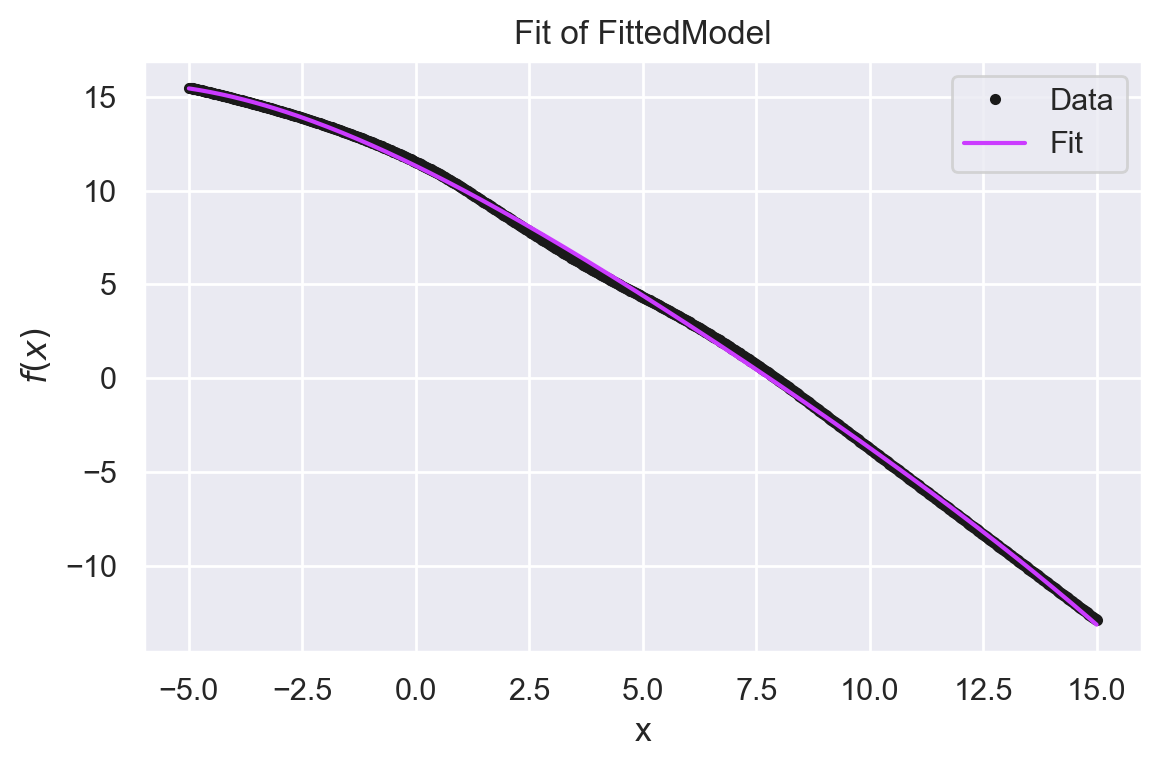

In [108]:
fitted_model.plot()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

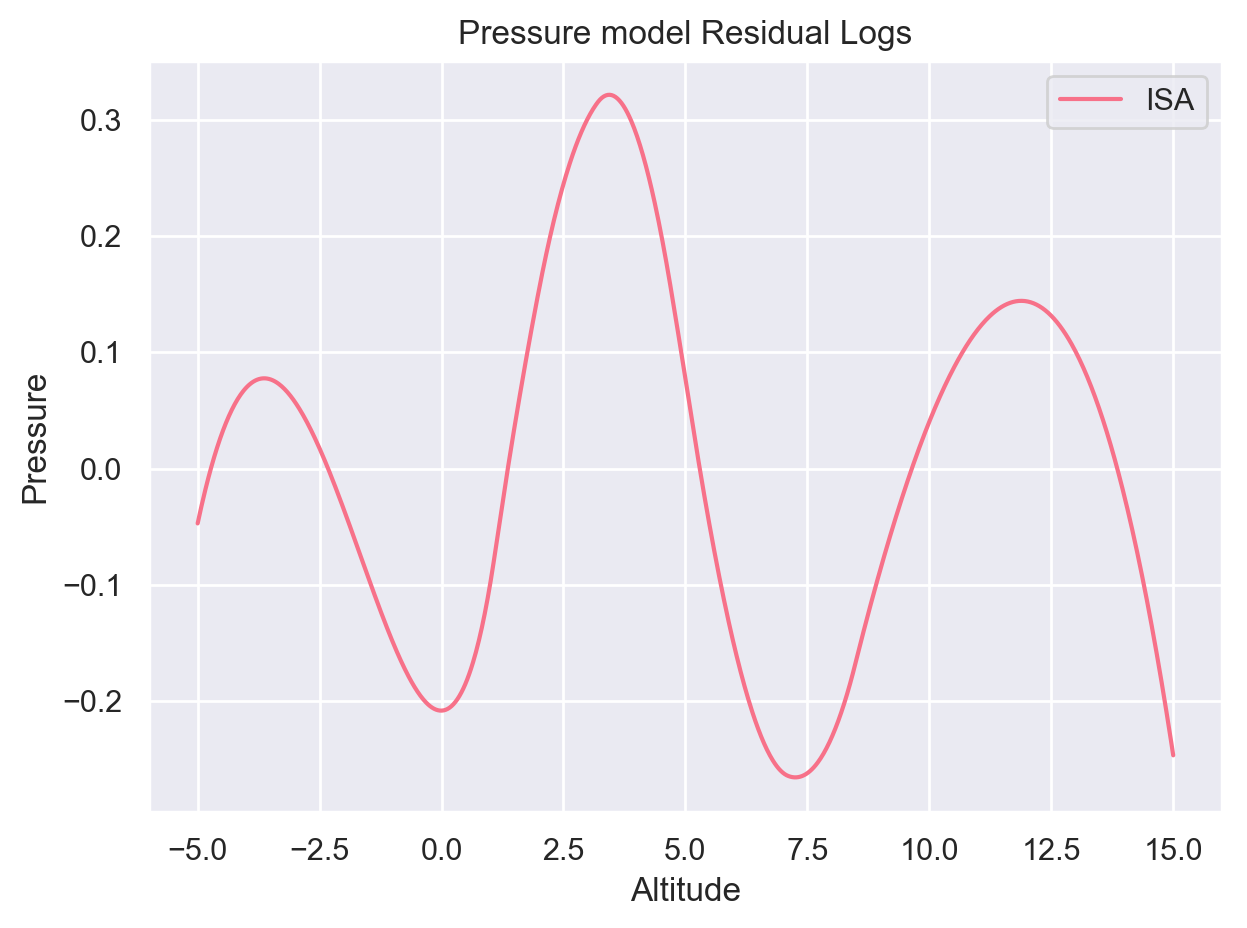

In [109]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(scaled_altitude, fitted_model(scaled_altitude)-logs_pressure, label="ISA")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Residual Logs")
plt.tight_layout()
plt.legend()
plt.show()

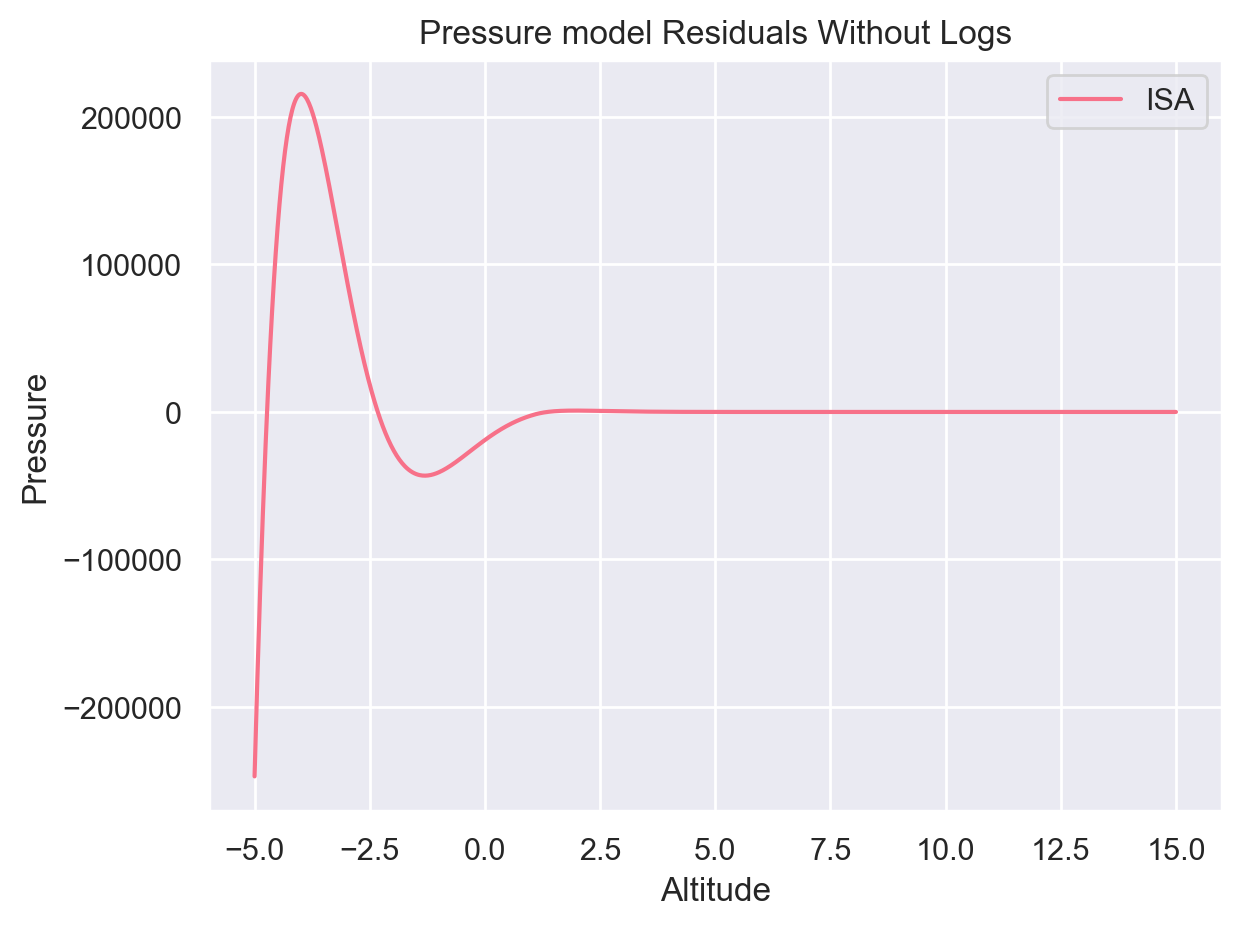

In [110]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(scaled_altitude, np.exp(fitted_model(scaled_altitude))-pressure_isa, label="ISA")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Residuals Without Logs")
plt.tight_layout()
plt.legend()
plt.show()

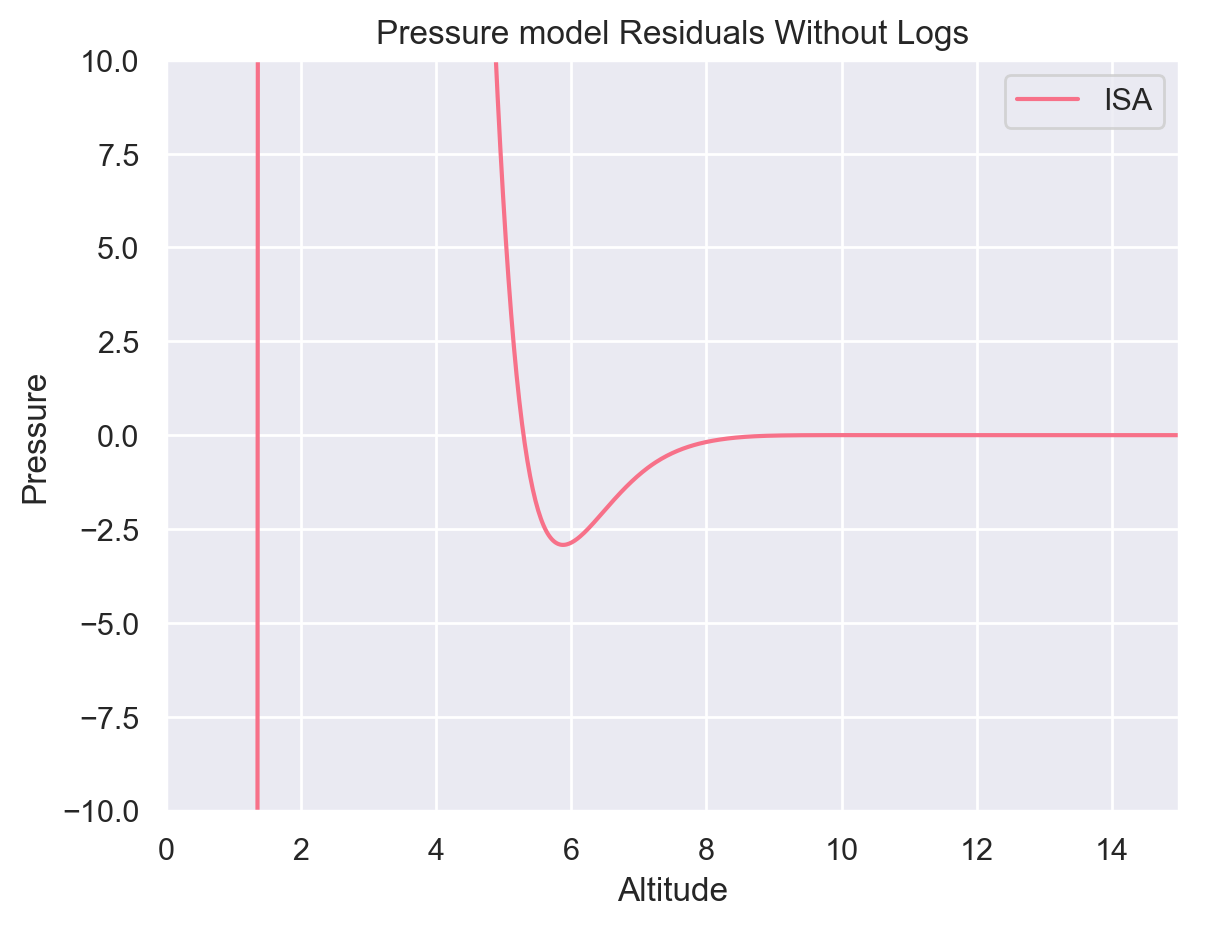

In [111]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(scaled_altitude, np.exp(fitted_model(scaled_altitude))-pressure_isa, label="ISA")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Residuals Without Logs")
plt.tight_layout()
plt.legend()
plt.xlim([0, 15])
plt.ylim([-10, 10])
plt.show()

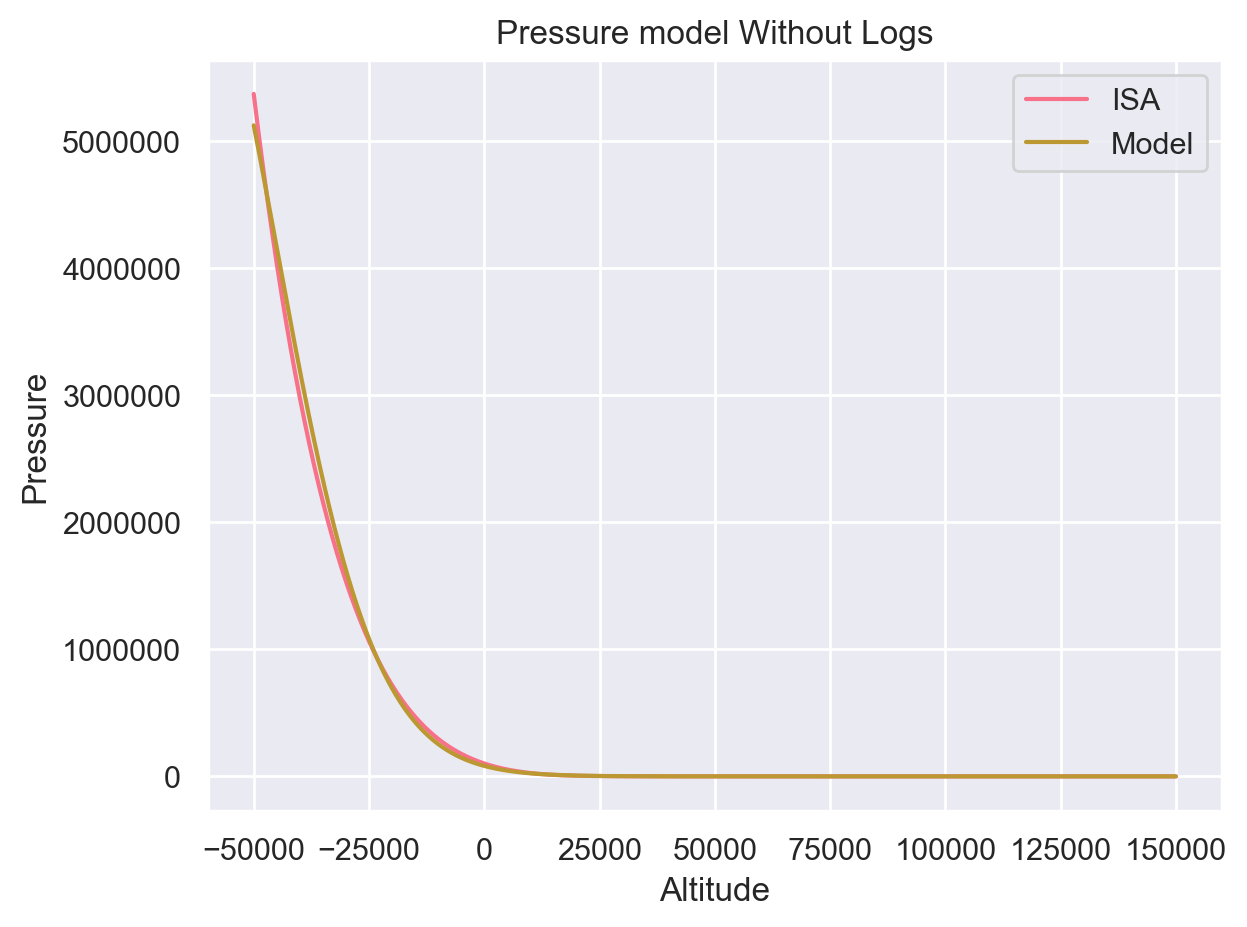

In [112]:

sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, pressure_isa, label="ISA")
plt.plot(altitude, np.exp(fitted_model(scaled_altitude)), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Without Logs")
plt.tight_layout()
plt.legend()
plt.show()

In [150]:
logs_temperature=np.log(temperature_isa)
def model2(x, p):
    return (p["c1"] + p["c2"] * x+p['c3']*x**2)/(p["c5"] + p["c6"] * x  +p['c7']*x**2)+p['c9']
fitted_model_temp = FittedModel(
    model=model2,
    x_data=scaled_altitude,
    y_data=logs_temperature,
    parameter_guesses={
        "c1": 0,
        "c2": 0,
        "c3": 0,
        "c4": 0,
        "c5": 1,
        "c6": 1,
        "c7": 1,
        "c8": 1,
        "c9": 0,

    }
)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [151]:
fitted_model_temp.goodness_of_fit()

0.9400878980725803

In [152]:
fitted_model_temp.parameters

{'c1': 0.2769841756833447,
 'c2': 0.0727619018794497,
 'c3': 0.006416824757606634,
 'c4': nan,
 'c5': 0.05899797098239521,
 'c6': 0.01686154827299248,
 'c7': 0.001562256706663073,
 'c8': nan,
 'c9': 0.9917216126267276}

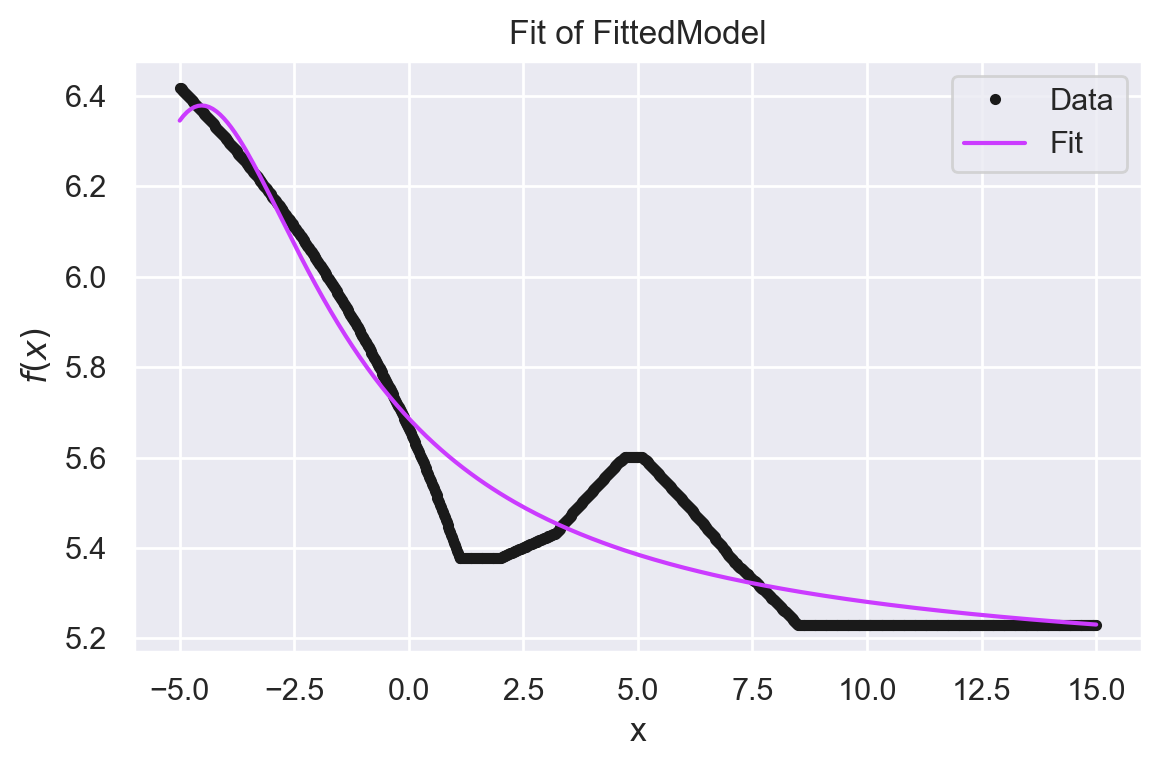

In [153]:
fitted_model_temp.plot()

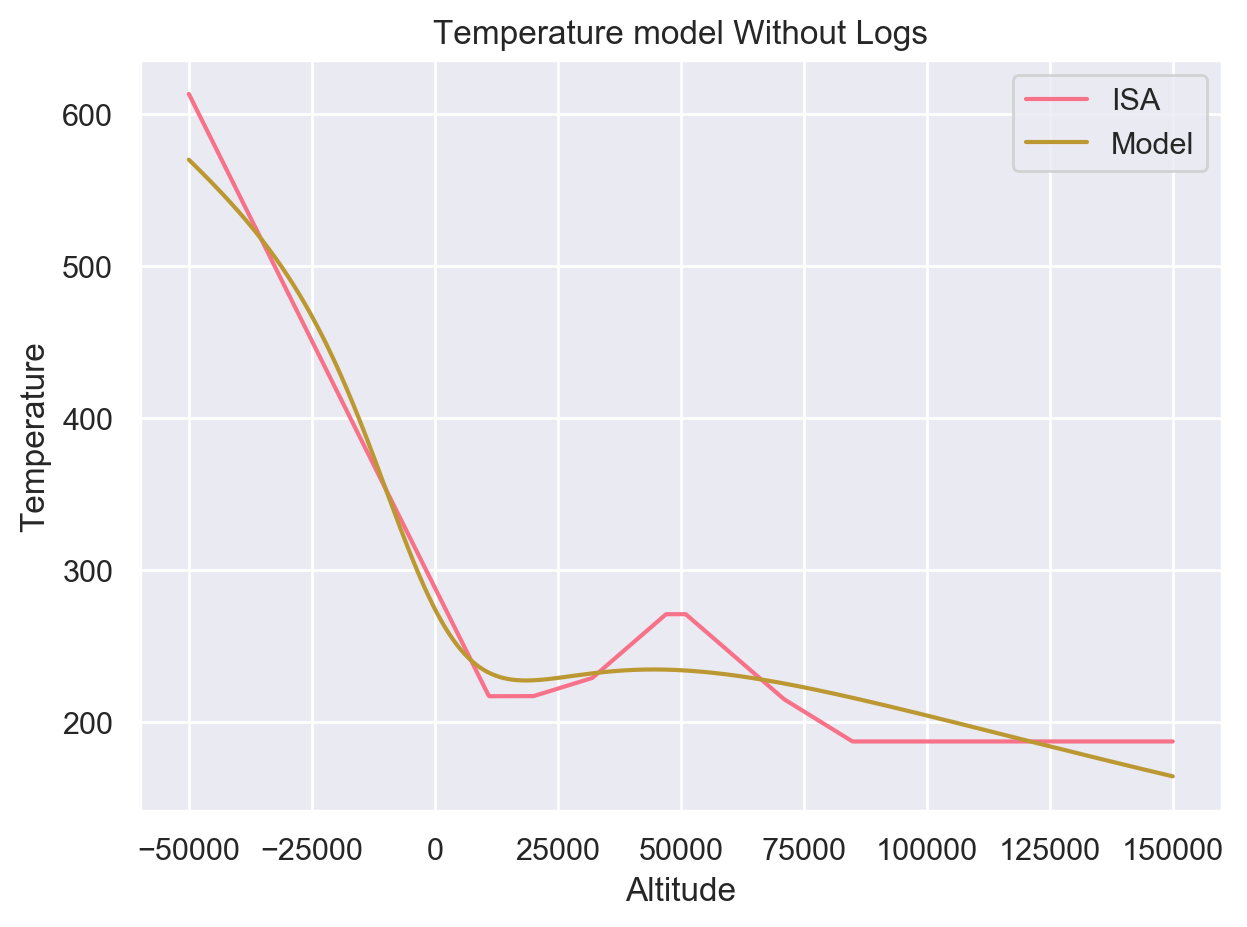

In [135]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, temperature_isa, label="ISA")
plt.plot(altitude, np.exp(fitted_model_temp(scaled_altitude)), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Temperature")
plt.title(r"Temperature model Without Logs")
plt.tight_layout()
plt.legend()
plt.show()

In [4]:
def imodel(x, p):
    return (p["c1"] + p["c2"] * x+p['c3']*x**2)
fitted_model_inter = InterpolatedModel(
    model=imodel,
    x_data=scaled_altitude,
    y_data=logs_temperature,
    parameter_guesses={
        "c1": 0,
        "c2": 0,
        "c3": 0,
        "c4": 0,
        "c5": 1,
        "c6": 1,
        "c7": 1,
        "c8": 1,
        "c9": 0,

    }
)
fitted_model_inter.plot()

NameError: name 'InterpolatedModel' is not defined